# UE 4268 - Examen 2023

By **`ASSIENE JESSE HUMPHREY`** and `humphrey.assiene@facsciences-uy1.cm` 

Department of Physics - Faculty of Science - ´University of Yaound

Laboratoire de `physique atomique, moléculaire et biophysique`

Juin 19, 2023

# VQE avec un Hardware Efficient Ansatz (HEA)

1. Utilisons  `qiskit.circuit.library.EfficientSU2` pour reproduire le Hardware Efficient Ansatz (HEA) suivant : 

In [1]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit.circuit import Parameter
from qiskit.tools.visualization import circuit_drawer, array_to_latex
from qiskit.quantum_info import state_fidelity
from qiskit import BasicAer
from qiskit.quantum_info import Statevector
from math import pi
backend = BasicAer.get_backend('unitary_simulator')
import matplotlib.pyplot as plt
from qiskit.quantum_info.operators import Operator, Pauli

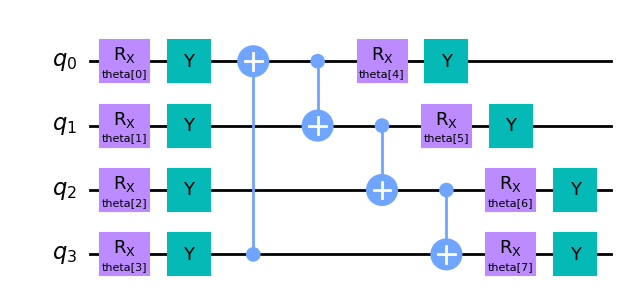

In [37]:
parameter_0 = Parameter('theta[0]')
parameter_1 = Parameter('theta[1]')
parameter_2 = Parameter('theta[2]')
parameter_3 = Parameter('theta[3]')
parameter_4 = Parameter('theta[4]')
parameter_5 = Parameter('theta[5]')
parameter_6 = Parameter('theta[6]')
parameter_7 = Parameter('theta[7]')
circuitQ = QuantumCircuit(4)
circuitQ.rx(theta = parameter_1,qubit = 1)
circuitQ.y(1)
circuitQ.rx(theta = parameter_0,qubit = 0)

circuitQ.y(0)


circuitQ.rx(theta = parameter_2,qubit = 2)
circuitQ.rx(theta = parameter_3,qubit = 3)
circuitQ.y(2)
circuitQ.y(3)
circuitQ.cx([3],[0])
circuitQ.cx([0],[1])
circuitQ.cx([1],[2])
circuitQ.cx([2],[3])

#circuitQ.rz(theta,3)


circuitQ.rx(theta = parameter_4,qubit = 0)
circuitQ.y(0)
circuitQ.rx(theta = parameter_5,qubit = 1)
circuitQ.rx(theta = parameter_6,qubit = 2)
circuitQ.rx(theta = parameter_7,qubit = 3)
circuitQ.y(1)
circuitQ.y(2)
circuitQ.y(3)


circuitQ.draw('mpl')

2. Utiliser ce HEA (que l'on nommera `SU2ansatz`) dans l'algorithme VQE, définit ci-dessous par la fonction `algorithm(problem, mapper, optimizer)`, pour calculer l'état fondamental de la molécule $H_2$.

In [33]:
from qiskit.primitives import Estimator
from qiskit.algorithms.minimum_eigensolvers import VQE
from qiskit_nature.second_q.algorithms import GroundStateEigensolver

import numpy as np

def algorithm(problem, mapper, optimizer):
    """ Setup VQE solver algorithm

    Args:
        problem : Electronic Structure Problem
        mapper : qubit mapper 
        optimizer : optimizer

    Returns: vqe solver algorithm
    """    
    
    #ansatz
    ansatz = SU2ansatz # previously constructed
    
    #VQE algorithm solver
    vqe_solver = VQE(Estimator(), ansatz, optimizer)
    vqe_solver.initial_point = np.zeros(ansatz.num_parameters)
 
    # Ground state computation using a minimum eigensolver
    algorithm = GroundStateEigensolver(mapper, vqe_solver)
       
    # Compute Ground State properties.
    algorithm = algorithm.solve(problem)
    
    return algorithm

In [34]:
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.second_q.transformers import FreezeCoreTransformer

H2_driver = PySCFDriver(
    atom='H .0 .0 -0.3625; H .0 .0 0.3625',
    basis="sto3g",
    charge=0,
    spin=0,
    unit=DistanceUnit.ANGSTROM,
)
# Electronic structure problem
H2_problem = H2_driver.run()
transformer = FreezeCoreTransformer()
H2_problem = transformer.transform(H2_problem)

### Mon code

In [40]:
from qiskit_nature.second_q.mappers import JordanWignerMapper
from qiskit_nature.second_q.mappers import TaperedQubitMapper
from qiskit.algorithms.optimizers import SLSQP

In [41]:
H2_driver = PySCFDriver(
    atom='H .0 .0 -0.3625; H .0 .0 0.3625',
    basis="sto3g",
    charge=0,
    spin=0,
    unit=DistanceUnit.ANGSTROM,
)

# Electronic structure problem
H2_problem = H2_driver.run()
transformer = FreezeCoreTransformer()
H2_problem = transformer.transform(H2_problem)

In [42]:
from qiskit_nature.second_q.mappers import (
    ParityMapper,
    JordanWignerMapper,
    BravyiKitaevMapper, 
    QubitConverter
)

def ansatz(converter):
    """Ansatz function

    Args:
        converter : the output of the function qubit_converter(mapper)

    Returns: The anstatz
    """    
    
    ansatz = UCCSD(
        circuitQ,
        (theta,
            
        ),
    )
    return ansatz

In [43]:
from qiskit.primitives import Estimator 

estimator = Estimator()

In [44]:
from qiskit.algorithms.optimizers import SPSA, SLSQP, L_BFGS_B

In [45]:
from qiskit.algorithms.minimum_eigensolvers import VQE
import numpy as np
#permet d calculer l'energie
def vqe_solver(converter, optimizer):# le mapper ici on choisi ce qu'on veut mettre on peut mettre jw; bk
    """ Setup VQE solver

    Args:
        converter : qubit converter 
        optimizer : optimizer

    Returns: vqe solver
    """    
    vqe_solver = VQE(estimator, circuitQ, optimizer)
# par exemple si on veut plutot utiliser le circuit on remplace ansatz par le circuit
    #vqe_solver.initial_point = np.zeros(ansatz(converter).num_parameters)
    return vqe_solver

In [49]:
def run_vqe(problem, solver, mapper, optimizer = "SLSQP", show=True):
    """Computing of the molecular ground state with the `GroundStateEigensolver`
class 
    Args:
        problem :  Electronic structure problem

        mapper : Mapper string that can be "PM" or "JWM" or "BKM"
        
        optimizer :  Optimizer string that can be either "SPSA" or "SLSQP" or "L_BFGS_B"

        solver :  Sting that can be either "NumPy" or "VQE"
       
    Returns:
          The ground state of the molecule

    """    
    # Mapper
    dmap = {"JWM": JordanWignerMapper(), "PM": ParityMapper(),  "BKM": BravyiKitaevMapper()}
    for k, v in dmap.items():
        if k == mapper:        
            q_conv = qubit_converter(v)   
            
    if solver == "VQE":             
        # Optimizer
        dopt = {"SPSA": SPSA(), "SLSQP": SLSQP(), "L_BFGS_B": L_BFGS_B()}
        for n, m in dopt.items():
            if n == optimizer:        
                opt = m
        GS_solver = vqe_solver(q_conv, opt)

    # Solver
    if solver == "Numpy":
        GS_solver = NumPyMinimumEigensolver()

    # Ground state computation using a minimum eigensolver. Returns the solver.
    Algo = GroundStateEigensolver(q_conv, GS_solver) 
    
    # Leveraging Qiskit Runtime
    start = time.time()
    
    # Compute Ground State properties.
    ground_state = Algo.solve(problem)
    elapsed = str(datetime.timedelta(seconds = time.time()- start))
    
    if show:
        print(f'Running {solver} and {mapper} mapper')
        if solver == "VQE":
            print(f'With {optimizer} optimizer and UCCSD ansatz')
        print(f'Elapsed time: {elapsed} \n')

        print(ground_state.total_energies[0])

    if solver == "VQE":
        return ground_state, elapsed, mapper, solver, optimizer
    else:
        return ground_state, elapsed, mapper, solver


In [57]:
from qiskit import QuantumCircuit
from qiskit.circuit import parameter
from qiskit_nature.second_q.algorithms import GroundStateEigensolver
import time, datetime

res_vqe = run_vqe(H2_problem, mapper="PM", optimizer="SLSQP", solver="VQE")

NameError: name 'qubit_converter' is not defined

# Support Vector Regression to predict polarity of molecules

Write a python script that use a **support vector regression (SVR)** model to predict **TPSA** (**Topological polar surface area**, a physicochemical property describing the polarity of molecules) from molecules of the ZING Dataset contained in the file `'.Zn10.txt'`. The input - structural feature of molecules is Morgan fingerprint and the output is TPSA.

We recall that the **molecular fingerprint** represents the substructures of a molecule (array) as a vector of binary numbers. It is a molecular structure descriptor to use as input to reveal the relationship between molecular structure and properties, called **Quantitative Structure-Activity Relationships (QSAR)**.

The workflow is

1. Get molecular fingerprints of each molecule
2. Split the dataset to training set and test set
3. Train a SVR model
4. Check the accuracy of prediction with $R²$ and mean-square error
5. Visualize the results from the model.

**The various necessaries libraries and modules will be import only where they are needed**.


In [59]:
# Import libraries 
import numpy as np
#Permet de tracer
import matplotlib.pyplot as plt
#bibliotheque
import pandas as pd 
import os
################################################################################
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem, PandasTools, Descriptors

ModuleNotFoundError: No module named 'rdkit'

In [ ]:
#permet de ressortir la molecule
smi = 'O=C(C)Oc1ccccc1C(=O)O'
m = Chem.MolFromSmiles(smi) # Convert smiles to molecule
m

In [ ]:
fps = []
fp = AllChem.GetMorganFingerprintAsBitVect(m, 2, nBits=1024) 
# the number 2 denotes the number of iterations in Morgan algorithm.

fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
fps.append(fp)

fps = np.asarray(fps) # Convert our encoded molecule to an array
fps.shape


In [ ]:
PATH = os.getcwd()
data_path = os.path.join(PATH, './Dataset/smilesZn100.txt')

In [ ]:
with open(data_path, 'r') as f:
    content = f.readlines()
    smile = [smi.split() for smi in content]
    
smile

In [ ]:
df = pd.DataFrame(data=smile, columns=['Smiles'])
#ici on sectionne notre base de donnee via df1
df1 = df.iloc[:1000,:]#.values nous donne les valeurs
df1

In [ ]:
PandasTools.AddMoleculeColumnToFrame(frame=df1, smilesCol='Smiles', molCol='Molecules')
df1

In [58]:
import qiskit.tools.jupyter
%qiskit_version_table